In [2]:
import sklearn

In [3]:
import numpy as np
import pygame

bg_color = (255, 255, 255)
color = (0, 0, 255)
radius = 2
width, height = 640, 480
dataset = np.empty([0, 2], dtype='f')
R = 30


def create_data(position):
    x, y = position
    global dataset
    r = np.random.uniform(0, R)
    phi = np.random.uniform(0, 2 * np.pi)
    coord = [x + r * np.cos(phi), y + r * np.sin(phi)]
    dataset = np.append(dataset, [coord], axis=0)


screen = pygame.display.set_mode((width, height))
pygame.init()
pygame.display.set_caption("Dataset")
running = True
pushing = False
screen.fill(bg_color)
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
    if pushing and np.random.uniform(0, 1) > 0.5:
        create_data(pygame.mouse.get_pos())  # event.pos
    for dot in dataset:
        pygame.draw.circle(screen, color, (int(dot[0]), int(dot[1])), radius)
    pygame.display.flip()
pygame.quit()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
print(dataset)

[[ 94.34540214  73.80629406]
 [105.45448724  87.15823055]
 [116.64676635  76.72316146]
 ...
 [160.54442055 437.88502485]
 [161.13270139 434.7996049 ]
 [157.47757808 441.65920902]]


In [20]:
import matplotlib.pyplot as plt
import numpy as np


class K_Means:
    def __init__(self, dataset, n_clusters=3, m_type='dist2'):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        self.tolerance = .01
        self.fitted = False
        self.labels = np.array([])
        self.m_type = m_type
        index = np.random.choice(dataset.shape[0], self.n_clusters, False)
        self.centroids = self.dataset[index]

        self.metrics = {'dist2': self.get_dist2,
                        'dist': self.get_dist,
                        'quarter': self.get_dist_quarter,
                        'chebishev': self.get_dist_chebishev
                        }

    def get_dist2(self, lst_1, lst_2):
        return sum((i - j) ** 2 for i, j in zip(lst_1, lst_2))

    def get_dist(self, lst_1, lst_2):
        return np.sqrt(sum((i - j) ** 2 for i, j in zip(lst_1, lst_2)))

    def get_dist_quarter(self, lst_1, lst_2):
        return sum(np.fabs(i - j) for i, j in zip(lst_1, lst_2))

    def get_dist_chebishev(self, lst_1, lst_2):
        return max(np.fabs(i - j) for i, j in zip(lst_1, lst_2))

    def distribute_data(self):
        self.labels = np.array([])
        dist_metric = self.get_dist_type()
        for elem in self.dataset:
            dist = [dist_metric(elem, center) for center in self.centroids]
            min_dist = min(dist)
            indx = dist.index(min_dist)
            self.labels = np.append(list(self.labels), indx).astype(int)

    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k, label in enumerate(self.labels):
                if label == i:
                    temp = temp + self.dataset[k]
                    num += 1
            self.centroids[i] = temp / num

    def fit(self):
        iter = 1
        metric = self.get_dist_type()
        while iter < self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([metric(i, k) for i, k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True

    def predict(self, dataset):
        if self.fitted:
            labels = np.array([])
            metric = self.get_dist_type()
            for elem in dataset:
                dist = (metric(elem, center) for center in self.centroids)
                min_dist = min(dist)
                indx = dist.index(min_dist)
                labels = np.append(list(labels), indx).astype(int)
            return labels
        else:
            raise Exception()

    def get_dist_type(self):
        return self.metrics.get(self.m_type, None)


test = K_Means(dataset, 3, m_type='dist2')
test.get_dist2(dataset[1], dataset[2])
test.fit()

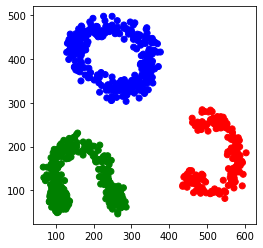

In [13]:
colors = np.array(['red', 'green', 'blue', 'black'])
pred = test.labels

plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[pred])
plt.show()

In [14]:
test = K_Means(dataset, 3, m_type='dist')
test.get_dist2(dataset[1], dataset[2])
test.fit()

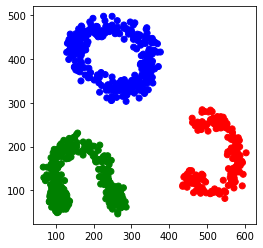

In [15]:
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[pred])
plt.show()

In [17]:
test = K_Means(dataset, 3, m_type='chebishev')
test.get_dist2(dataset[1], dataset[2])
test.fit()

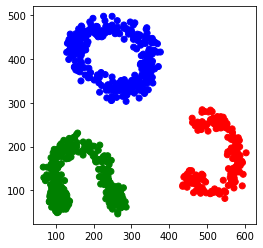

In [18]:
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[pred])
plt.show()

In [21]:
test = K_Means(dataset, 3, m_type='quarter')
test.get_dist2(dataset[1], dataset[2])
test.fit()

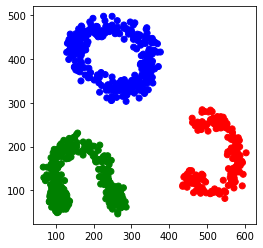

In [22]:
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[pred])
plt.show()